In [ ]:
import json

with open('data/labels_json/train_labels.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [9]:
print(f"Всего видео: {len(data)}")

Всего видео: 80


In [16]:
for key in list(data.keys())[:3]:
    print(key, data[key])

-220020068_456255414 {'url': 'https://vkvideo.ru/video-220020068_456255414', 'name': 'Баскетс. 4 сезон, 7 серия', 'start': '0:01:42', 'end': '0:01:47'}
-220020068_456249693 {'url': 'https://vkvideo.ru/video-220020068_456249693', 'name': 'Бывaeт и xyжe. 1 сезон, 14 серия', 'start': '0:00:06', 'end': '0:00:10'}
-220020068_456255339 {'url': 'https://vkvideo.ru/video-220020068_456255339', 'name': 'Анатомия скандала. 1 сезон. 2 серия.', 'start': '0:00:10', 'end': '0:00:20'}


In [11]:
titles = [item['name'] for item in data.values()]
print(f"Средняя длина названия: {sum(len(t) for t in titles) / len(titles)}")

Средняя длина названия: 29.9


In [15]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

durations = [abs(time_to_seconds(item['end']) - time_to_seconds(item['start'])) for item in data.values()]
print(f"Средняя длительность: {sum(durations) / len(durations)} сек")

Средняя длительность: 18.6375 сек


В некоторых данных время start оказывается больше end (именно поэтому применяется abs). Значит при обучении нужно будет такое отслеживать. Либо необходимо приготовить датасет до обучения.

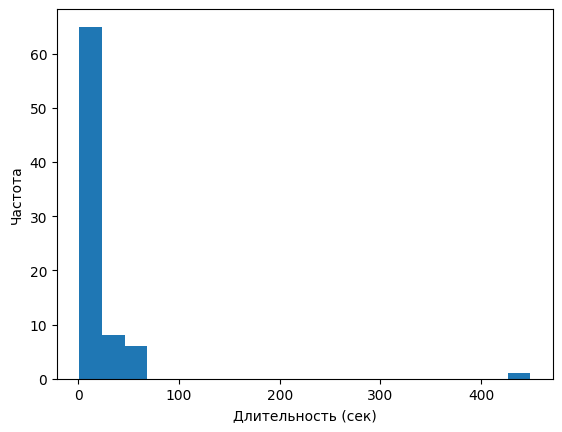

In [19]:
import matplotlib.pyplot as plt

plt.hist(durations, bins=20)
plt.xlabel('Длительность (сек)')
plt.ylabel('Частота')
plt.show()

В данных есть длинные вставки. Следует их проверить или отфильтровать.

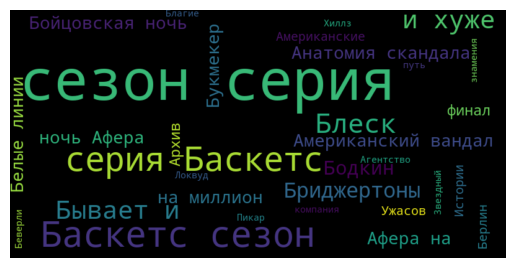

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(titles))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
urls = [item['url'] for item in data.values()]
print(f"Уникальных URL: {len(set(urls))}")

Уникальных URL: 80


In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(data, orient='index')

,url,name,start,end
-220020068_456255414,https://vkvideo.ru/video-220020068_456255414,"Баскетс. 4 сезон, 7 серия",0:01:42,0:01:47
-220020068_456249693,https://vkvideo.ru/video-220020068_456249693,"Бывaeт и xyжe. 1 сезон, 14 серия",0:00:06,0:00:10
-220020068_456255339,https://vkvideo.ru/video-220020068_456255339,Анатомия скандала. 1 сезон. 2 серия.,0:00:10,0:00:20
-220020068_456241755,https://vkvideo.ru/video-220020068_456241755,"Блеск. 2 сезон, 2 серия",0:03:08,0:03:12
-220020068_456241671,https://vkvideo.ru/video-220020068_456241671,"Амepикaнcкий вaндaл. 1 сезон, 3 серия",0:03:47,0:03:10
...,...,...,...,...
-220020068_456249719,https://vkvideo.ru/video-220020068_456249719,"Бывaeт и xyжe. 2 сезон ,6 серия",0:00:06,0:00:10
-220020068_456255400,https://vkvideo.ru/video-220020068_456255400,"Баскетс. 3 сезон, 3 серия",0:00:17,0:00:22
-220020068_456256446,https://vkvideo.ru/video-220020068_456256446,"Бойцовская ночь: Афера на миллион. 1 сезон, 4 ...",0:05:41,0:05:25
-220020068_456255401,https://vkvideo.ru/video-220020068_456255401,"Баскетс. 3 сезон, 4 серия",0:00:17,0:00:22
